<a href="https://colab.research.google.com/github/cekbote/pytorch-tutorials/blob/master/Linear_Regression_and_Gradient_Decscent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression and Gradient Descent

The goal of this notebook is to create a linear regression model from scratch for predicting crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall and humidity (input variables or features) in a region

In [1]:
import numpy as np
import torch

## Training Data

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
# Targets (apples, oranges)
targets =  np.asarray([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Linear Regression Model from Scratch

In [5]:
# Weights and Biasis
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.4303,  0.0082, -0.9170],
        [-1.1769, -0.9973,  0.1772]], requires_grad=True)
tensor([ 0.0694, -0.8245], requires_grad=True)


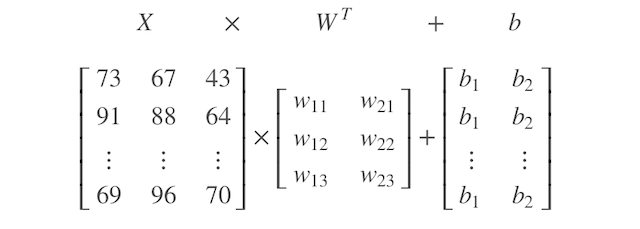

In [6]:
# @ represents matrix multiplication in PyTorch, and the .t method returns the 
# transpose of a tensor.

def model(x):
  return x @ w.t() + b 

In [7]:
# Generate Predictions

preds = model(inputs)
print(preds)

tensor([[ -70.2271, -145.9411],
        [ -97.0584, -184.3484],
        [ -89.4562, -226.5803],
        [ -77.4021, -157.1997],
        [ -93.0274, -165.3712]], grad_fn=<AddBackward0>)


In [8]:
# Compare the targets

print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Loss Function

In [9]:
# MSE Loss

# torch.sum returns the sum of all the elements in a tensor, and the .numel 
# method

def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff*diff) / diff.numel()

In [10]:
# Compute loss

loss = mse(preds, targets)
print(loss)

tensor(51533.2383, grad_fn=<DivBackward0>)


## Compute Gradients

In [11]:
# Compute gradients

# With PyTorch, we can automatically compute the gradient or derivative of the 
# loss w.r.t. to the weights and biases, because they have requires_grad set to 
# True.

# The gradients are stored in the .grad property of the respective tensors. Note 
# that the derivative of the loss w.r.t. the weights matrix is itself a matrix, 
# with the same dimensions.

# To reduce memory usage, during the .backward() call, all the intermediary 
# results are deleted when they are not needed anymore. Hence if you try to call 
# .backward() again, the intermediary results don’t exist and the backward pass 
# cannot be performed (and you get the error you see). You can call 
# .backward(retain_graph=True) to make a backward pass that will not delete 
# intermediary results, and so you will be able to call .backward() again. All 
# but the last call to backward should have the retain_graph=True option

loss.backward()

In [12]:
# Gradients for weights

print(w)
print(w.grad)

tensor([[-0.4303,  0.0082, -0.9170],
        [-1.1769, -0.9973,  0.1772]], requires_grad=True)
tensor([[-13443.6982, -15030.4824,  -9262.7529],
        [-22488.7754, -24682.5391, -15098.9600]])


In [13]:
# Before we proceed, we reset the gradients to zero by calling .zero_() method. 
# We need to do this, because PyTorch accumulates, gradients i.e. the next time 
# we call .backward on the loss, the new gradient values will get added to the 
# existing gradient values, which may lead to unexpected results.

w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## Adjust weights and biases using gradient descent

- Generate predictions

- Calculate the loss

- Compute gradients w.r.t the weights and biases

- Adjust the weights by subtracting a small quantity proportional to the gradient

- Reset the gradients to zero




In [14]:
# Generate Predictions

preds = model(inputs)
print(preds)

tensor([[ -70.2271, -145.9411],
        [ -97.0584, -184.3484],
        [ -89.4562, -226.5803],
        [ -77.4021, -157.1997],
        [ -93.0274, -165.3712]], grad_fn=<AddBackward0>)


In [15]:
# Calculate the loss

loss = mse(preds, targets)
print(loss)

tensor(51533.2383, grad_fn=<DivBackward0>)


In [16]:
# Compute gradients

loss.backward()
print(w.grad)
print(b.grad)

tensor([[-13443.6982, -15030.4824,  -9262.7529],
        [-22488.7754, -24682.5391, -15098.9600]])
tensor([-161.6343, -267.8881])


In [17]:
# Adjust weights and reset gradients

# torch.no_grad() is used to make sure that the differene is not added to the 
# computation graph as the computation graph is created dynamically in PyTorch.
# An excellent article that explains it can be found at 
# https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/

# We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate 
# or modify gradients while updating the weights and biases.

with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [18]:
print(w)
print(b)

tensor([[-0.2959,  0.1585, -0.8244],
        [-0.9520, -0.7505,  0.3282]], requires_grad=True)
tensor([ 0.0710, -0.8218], requires_grad=True)


## Train for multiple epochs

In [19]:
# Train for 100 epochs

for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [20]:
# Calculate loss

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(117.6237, grad_fn=<DivBackward0>)


In [21]:
# Predictions

preds

tensor([[ 60.7243,  72.3928],
        [ 77.1439, 103.5714],
        [124.4863, 123.0075],
        [ 40.9407,  50.0655],
        [ 81.5385, 116.4096]], grad_fn=<AddBackward0>)

In [22]:
# Targets

targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

## Linear regression using PyTorhc builtins

In [23]:
import torch.nn as nn

In [24]:
# Input (temp, rainfall, humidity)

inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)

targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [25]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

## Dataset and DataLoader

In [26]:
from torch.utils.data import TensorDataset

In [27]:
# Define dataset

# The TensorDataset allows us to access a small section of the training data 
# using the array indexing notation ([0:3] in the above code). It returns a 
# tuple (or pair), in which the first element contains the input variables for 
# the selected rows, and the second contains the targets.

train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [28]:
# Define data loader

from torch.utils.data import DataLoader

# We'll also create a DataLoader, which can split the data into batches of a 
# predefined size while training. It also provides other utilities like 
# shuffling and random sampling of the data.

# https://medium.com/speechmatics/how-to-build-a-streaming-dataloader-with-pytorch-a66dd891d9dd

batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [29]:
for xb, yb in train_dl:
  print(xb)
  print(yb)
  

tensor([[ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [ 69.,  96.,  70.]])
tensor([[103., 119.],
        [ 81., 101.],
        [ 56.,  70.],
        [119., 133.],
        [103., 119.]])
tensor([[ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 73.,  67.,  43.]])
tensor([[ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [ 56.,  70.],
        [ 56.,  70.]])
tensor([[ 87., 134.,  58.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [102.,  43.,  37.]])
tensor([[119., 133.],
        [103., 119.],
        [ 81., 101.],
        [ 22.,  37.],
        [ 22.,  37.]])


## nn.Linear

In [30]:
# Define model

model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4143,  0.2224, -0.1375],
        [-0.2071, -0.4452, -0.2748]], requires_grad=True)
Parameter containing:
tensor([ 0.4703, -0.2840], requires_grad=True)


In [31]:
# PyTorch models also have a helpful .parameters method, which returns a list 
# containing all the weights and bias matrices present in the model. For our 
# linear regression model, we have one weight matrix and one bias matrix. 

print(model.parameters())
print(list(model.parameters()))

<generator object Module.parameters at 0x7fcedc085d58>
[Parameter containing:
tensor([[ 0.4143,  0.2224, -0.1375],
        [-0.2071, -0.4452, -0.2748]], requires_grad=True), Parameter containing:
tensor([ 0.4703, -0.2840], requires_grad=True)]


In [32]:
# Generate predictions

preds = model(inputs)
preds

tensor([[ 39.7015, -57.0522],
        [ 48.9417, -75.9016],
        [ 58.3378, -93.9051],
        [ 47.2046, -50.7245],
        [ 40.7810, -76.5555],
        [ 39.7015, -57.0522],
        [ 48.9417, -75.9016],
        [ 58.3378, -93.9051],
        [ 47.2046, -50.7245],
        [ 40.7810, -76.5555],
        [ 39.7015, -57.0522],
        [ 48.9417, -75.9016],
        [ 58.3378, -93.9051],
        [ 47.2046, -50.7245],
        [ 40.7810, -76.5555]], grad_fn=<AddmmBackward>)

## Loss Function

In [33]:
# Instead of defining a loss function manually, we can use the built-in loss 
# function mse_loss.

# Import nn.functional  

# The nn.functional package contains many useful loss functions and several 
# other utilities.


import torch.nn.functional as F

In [34]:
# Define Loss Function

loss_fn = F.mse_loss

In [35]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(15433.9648, grad_fn=<MseLossBackward>)


## Optimizer

In [36]:
# Instead of manually manipulating the model's weights & biases using gradients, 
# we can use the optimizer optim.SGD. SGD stands for stochastic gradient 
# descent. It is called stochastic because samples are selected in batches 
# (often with random shuffling) instead of as a single group.

# Note that model.parameters() is passed as an argument to optim.SGD, so that 
# the optimizer knows which matrices should be modified during the update step. 
# Also, we can specify a learning rate which controls the amount by which the 
# parameters are modified.

# Define optimizer

opt = torch.optim.SGD(model.parameters(), lr=1e-5)

## Train the Model

- Generate predictions
- Calculate the loss
- Compute gradients w.r.t the weights and biases
- Adjust the weights by subtracting a small quantity proportional to the gradient
- Reset the gradients to zero

In [38]:
# The only change would be that we'd be working with batches.

# Instead of updating parameters (weights and biases) manually, we use 
# opt.step to perform the update, and opt.zero_grad to reset the gradients to 
# zero.

# Utility function to train the model

def fit(num_epochs, model, loss, opt, train_dl):

  # Repeat for given number of epochs
  for epoch in range(num_epochs):

    # Train with bacthes of data
    for xb, yb in train_dl:

      # Generate prediction
      pred = model(xb)

      # Calculate loss
      loss = loss_fn(pred, yb)

      # Compute gradients
      loss.backward()

      # Update parameters using gradients
      opt.step()

      # Reset the gradients to zero
      opt.zero_grad()

    # Print the progress
    if (epoch + 1) % 10 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [40]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 251.9525
Epoch [20/100], Loss: 554.1702
Epoch [30/100], Loss: 320.2581
Epoch [40/100], Loss: 179.9800
Epoch [50/100], Loss: 88.5865
Epoch [60/100], Loss: 98.9584
Epoch [70/100], Loss: 76.1620
Epoch [80/100], Loss: 58.2024
Epoch [90/100], Loss: 69.2773
Epoch [100/100], Loss: 49.4854


In [41]:
# Generate predictions

preds = model(inputs)
preds

tensor([[ 59.1159,  71.9648],
        [ 79.7722,  98.4242],
        [122.2742, 136.5171],
        [ 30.6517,  45.6871],
        [ 92.1068, 110.0344],
        [ 59.1159,  71.9648],
        [ 79.7722,  98.4242],
        [122.2742, 136.5171],
        [ 30.6517,  45.6871],
        [ 92.1068, 110.0344],
        [ 59.1159,  71.9648],
        [ 79.7722,  98.4242],
        [122.2742, 136.5171],
        [ 30.6517,  45.6871],
        [ 92.1068, 110.0344]], grad_fn=<AddmmBackward>)

In [42]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])